In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("static-data_ncop.csv")

df_logistic = pd.read_csv("QOEALL - Sheet1.csv")

/var/folders/99/0yd48j791r3041y4rjsmf0t40000gn/T/ipykernel_10387/1176006284.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("static-data_ncop.csv")


In [3]:
df.head()

,Seg_#,Arr_time,Del_Time,Stall_Dur,Rep_Level,Del_Rate,Act_Rate,Byte_Size,Buff_Level,Algorithm,...,Protocol,P.1203,Clae,Duanmu,Yin,Yu,folder_name,host,band,delay
0,1,152,152,0,239,112,8,2132,2000.0,arbiter,...,HTTP/1.1,1.878,0.00,1726.005,239515.0,233515.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10
1,2,3295,1957,0,239,337,329,82445,4000.0,arbiter,...,HTTP/1.1,1.878,0.48,1721.405,239515.0,467030.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10
2,3,6033,2176,0,239,430,468,117046,3262.0,arbiter,...,HTTP/1.1,1.878,0.48,1721.405,239515.0,706545.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10
3,4,8785,2177,0,239,397,432,108123,2511.0,arbiter,...,HTTP/1.1,1.878,0.48,1721.405,239515.0,946060.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10
4,5,11056,1692,0,239,320,270,67720,2240.0,arbiter,...,HTTP/1.1,1.878,0.48,1721.405,239515.0,1185575.0,_host_10_band_5.0_delay_10_ploss_0.0,10,5,10


In [4]:
df['Algorithm'].unique()

array(['arbiter', 'elastic', 'bba', nan, 'conventional', 'exponential'],
      dtype=object)

In [5]:
df.shape

(78979, 27)

In [6]:
df = df.dropna(subset=['Algorithm'])

In [7]:
df.shape

(78969, 27)

In [8]:
df['Algorithm'].unique()

array(['arbiter', 'elastic', 'bba', 'conventional', 'exponential'],
      dtype=object)

In [9]:
bba = df[df['Algorithm']=='bba']
arbiter = df[df['Algorithm']=='arbiter']
elastic = df[df['Algorithm']=='elastic']
conventional = df[df['Algorithm']=='conventional']
exponential = df[df['Algorithm']=='exponential']
exponential = df[df['Algorithm']=='exponential']
logistic = df_logistic[df_logistic['Algo']=='logistic']
# logistic.to_csv("logistic.csv",index=False);

In [10]:
#fair comparison - drop bba from 13 seg and after 30.

In [11]:
# Convert Seg_# to numeric safely
bba.loc[:, 'Seg_#'] = pd.to_numeric(bba['Seg_#'], errors='coerce')

# Filter rows Seg_# 14–30
bba_filtered = bba[(bba['Seg_#'] >= 14) & (bba['Seg_#'] <= 30)].reset_index(drop=True)

print(bba_filtered.shape)

(4570, 27)


In [12]:
bba_filtered = bba_filtered[['Seg_#','Algorithm','host',	'band',	'delay','P.1203']]
bba_filtered.head()

,Seg_#,Algorithm,host,band,delay,P.1203
0,14,bba,10,5,10,1.271
1,15,bba,10,5,10,1.266
2,16,bba,10,5,10,1.260
3,17,bba,10,5,10,1.255
4,18,bba,10,5,10,1.250


In [13]:
df_logistic=logistic[['IntSeg','Algo','Competitions','Bandwidth','Delay','P1203']]
df_logistic = df_logistic.rename(columns={
    'IntSeg': 'Seg_#',
    'Algo': 'Algorithm',
    'Competitions': 'host',
    'Bandwidth': 'band',
    'Delay': 'delay',
    'P1203':'P.1203'
})
df_logistic.head()

,Seg_#,Algorithm,host,band,delay,P.1203
9180,14.0,logistic,5,5,100,1.740
9181,15.0,logistic,5,5,100,1.686
9182,16.0,logistic,5,5,100,1.645
9183,17.0,logistic,5,5,100,1.599
9184,18.0,logistic,5,5,100,1.562


In [14]:
arb_ela = df[(df['Algorithm']=='arbiter') | (df['Algorithm']=='elastic')]
con_exp = df[(df['Algorithm']=='conventional') | (df['Algorithm']=='exponential')]

bba_logistic = pd.concat([bba_filtered, df_logistic], ignore_index=True)

In [15]:
print(bba.shape, arbiter.shape,elastic.shape,conventional.shape,exponential.shape, logistic.shape)

(15151, 27) (15889, 27) (16065, 27) (15817, 27) (16047, 27) (4590, 12)


In [16]:
print(arb_ela.shape, con_exp.shape, bba_logistic.shape)

(31954, 27) (31864, 27) (9160, 6)


In [18]:
# arbiter.groupby(['host', 'band','delay']).size().reset_index(name='count')

In [19]:
arbiter[['Seg_#','Algorithm','P.1203','host','band','delay']].head()

,Seg_#,Algorithm,P.1203,host,band,delay
0,1,arbiter,1.878,10,5,10
1,2,arbiter,1.878,10,5,10
2,3,arbiter,1.878,10,5,10
3,4,arbiter,1.878,10,5,10
4,5,arbiter,1.878,10,5,10


In [37]:
def compute_p1203_summary(df):
    summary_df = (
        df
        .groupby(['host', 'band', 'delay'])['P.1203']
        .agg(
            median='median',
            p10=lambda x: x.quantile(0.10),
            p90=lambda x: x.quantile(0.90)
        )
        .reset_index()
    )

    return summary_df



In [46]:
arb_summary = compute_p1203_summary(arbiter)
bba_summary = compute_p1203_summary(bba)
conventional_summary = compute_p1203_summary(conventional)
elastic_summary = compute_p1203_summary(elastic)
logistic_summary = compute_p1203_summary(df_logistic)
exponential_summary = compute_p1203_summary(exponential)

In [47]:
def plot_p1203_facet(df, image_name="default.pdf", algo_name="default"):

    g = sns.FacetGrid(
        df,
        col="delay",
        hue="host",
        hue_kws={"marker": ["v", "o", "^"]},
        height=3.5,
        aspect=.5
    )

    g.map(plt.scatter, "band", "median")

    g.set_axis_labels("", "P.1203")
    g.add_legend(title="Nodes")

    plt.xticks([5, 10, 15])

    axes = g.axes.flatten()
    axes[0].set_title("Delay 10 ms")
    axes[1].set_title("Delay 50 ms")
    axes[2].set_title("Delay 100 ms")
    axes[1].set_xlabel(str(algo_name)+": Bandwidth in Mbps")

    plt.tight_layout()
    plt.savefig(image_name, dpi=300, bbox_inches="tight")
    plt.show()

    return image_name

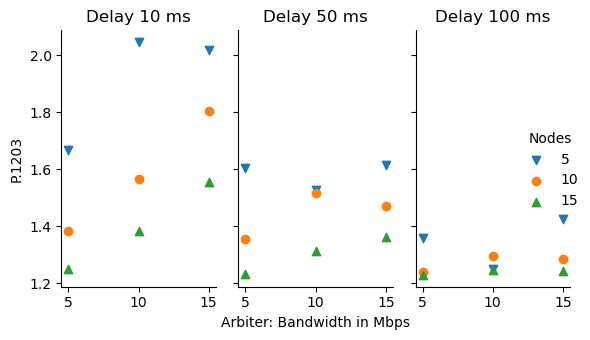

'arbiter_median.pdf'

In [48]:
plot_p1203_facet(arb_summary, "arbiter_median.pdf","Arbiter")

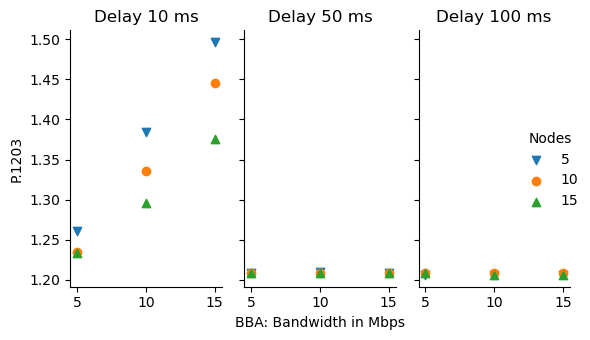

'bba_median.pdf'

In [49]:
plot_p1203_facet(bba_summary, "bba_median.pdf","BBA")

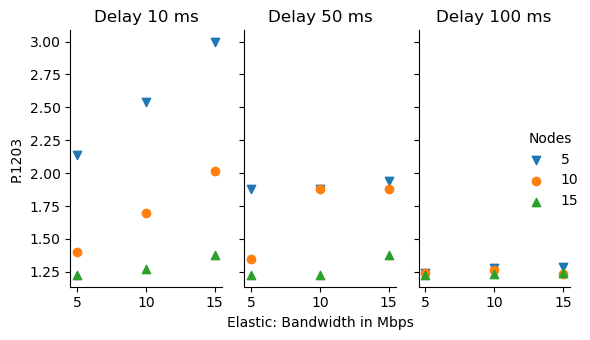

'elastic_median.pdf'

In [50]:
plot_p1203_facet(elastic_summary, "elastic_median.pdf","Elastic")

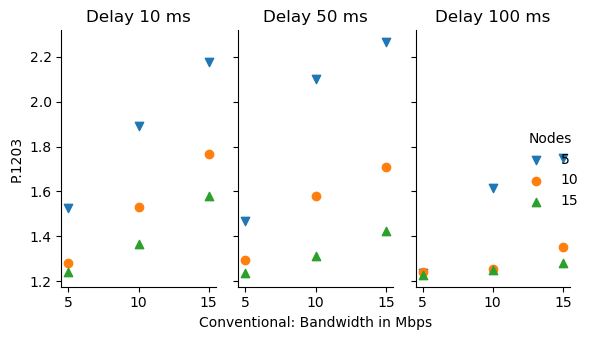

'conventional_median.pdf'

In [51]:
plot_p1203_facet(conventional_summary, "conventional_median.pdf","Conventional")

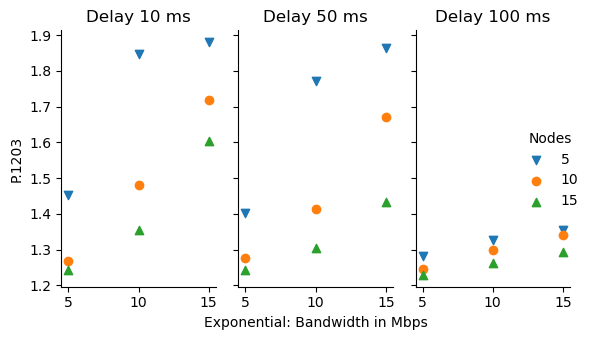

'exponential_median.pdf'

In [52]:
plot_p1203_facet(exponential_summary, "exponential_median.pdf","Exponential")

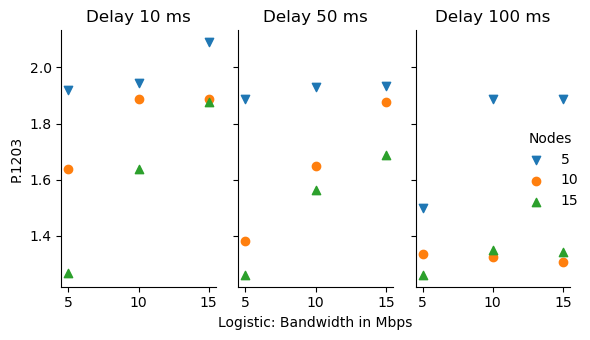

'logistic_median.pdf'

In [53]:
plot_p1203_facet(logistic_summary, "logistic_median.pdf","Logistic")